## Load data and preprocessing

In [7]:
import pandas as pd
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Multiply, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model




ModuleNotFoundError: No module named 'tensorflow.keras'

In [4]:
train_dir = 'FER2013/train/'
test_dir = 'FER2013/test/'

row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

       angry  disgust  fear  happy  neutral  preprocessed   sad  surprise
train   3995      436  4097   7215     4965             0  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


<Axes: >

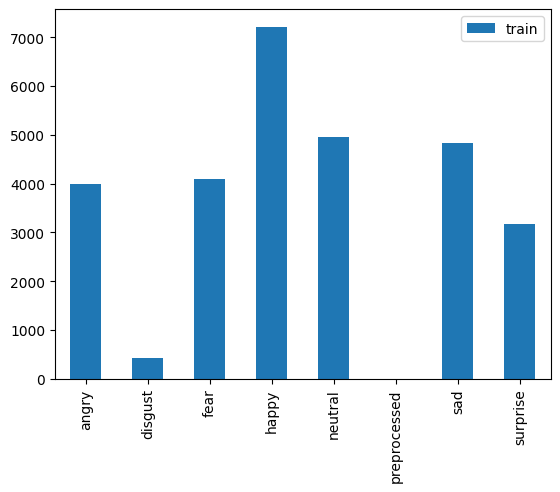

In [5]:
# plot train data count
train_count.transpose().plot(kind='bar')

<Axes: >

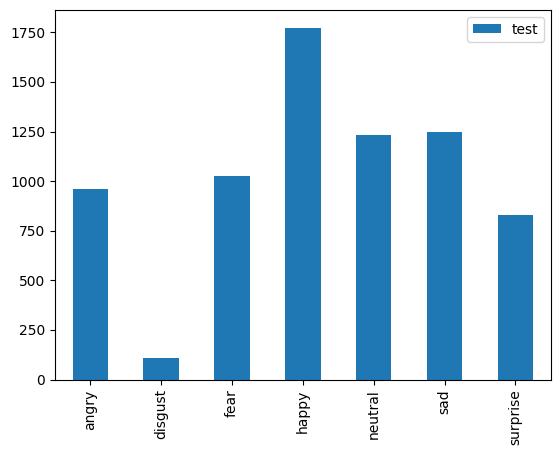

In [6]:
# plot test data count
test_count.transpose().plot(kind='bar')

In [7]:
labels = {
    "angry": 0,
    "disgust": 1,
    "fear": 2,
    "happy": 3,
    "neutral": 4,
    "sad": 5,
    "surprise": 6
}

In [8]:


def preprocess_image(image):
    # Normalize the pixel values to a range of 0-255
    cv2.normalize(image, image, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # Apply histogram equalization to improve contrast
    image = cv2.equalizeHist(image)

    # Remove noisy images with low variance
    if np.var(image) < 10:
        return None

    return image

train_dir = os.path.abspath("FER2013/train")
train_X = []
train_y = []
# Loop through each image in the FER2013 dataset and preprocess it
for emotion in os.listdir(train_dir):
    if emotion == '.DS_Store':
        continue
    emotion_path = os.path.join(train_dir, emotion)
    for image_name in os.listdir(emotion_path):
        image_path = os.path.join(emotion_path, image_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        preprocessed_image = preprocess_image(image)

        # If the preprocessed image is not None, save it to the dataset
        if preprocessed_image is not None:
            train_X.append(preprocessed_image)
            train_y.append(labels[emotion])

In [11]:
print(len(train_X), len(train_y))

28698 28698


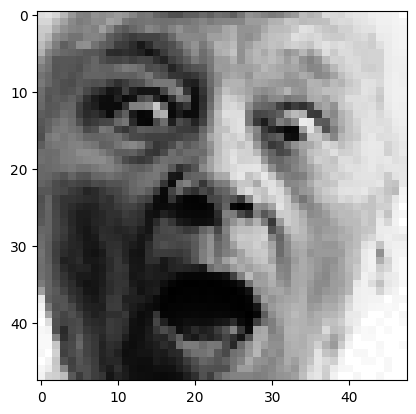

In [18]:
plt.imshow(train_X[-1], cmap='gray')
plt.show()

In [19]:
train_y[-1]

6